In [1]:
import ctree
from sklearn.tree import DecisionTreeRegressor
from numba import njit
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from time import time

np.random.seed(1)
homog = ctree.Dataset(n = 2000, m = 6, p_treated=0.2)
hetero = ctree.Dataset(n = 2000, m = 6, p_treated=0.2, homogeneous=False)

X = hetero.df.drop('y', axis = 1).values
y = hetero.df['y'].values

In [2]:
mse = njit(ctree.CART.SSE)
pred = njit(ctree.CART.meanpredictor)
eidx = np.array([True for _ in range(X.shape[0])])

%timeit ctree.CART.Node(X,y, mse, pred)

346 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%timeit ctree.CART.Node(X, y, ctree.CART.SSE, ctree.CART.meanpredictor, jit = False)

1.12 s ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# Jitted tree
p1 = ctree.Partition()
p1.fit(X,y)
tic = time()
p1.predict(X) 
toc = time()
print('first time', toc - tic)

tic = time()
p1.predict(X) 
toc = time()
print('second time', toc - tic)

first time 1.227046251296997
second time 0.014810800552368164


In [5]:
# Unjitted tree
p2 = ctree.Partition(jit = False)
p2.fit(X,y)

tic = time()
p2.predict(X) 
toc = time()
print('first time', toc - tic)

tic = time()
p2.predict(X) 
toc = time()
print('second time', toc - tic)

first time 6.55109429359436
second time 0.08822512626647949


<module 'matplotlib.pyplot' from '/home/kristian/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

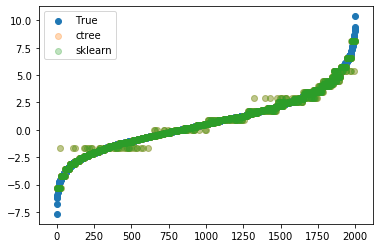

In [6]:
def sklearn_comparison(min_leaf_size = 1):
    p = ctree.Partition(min_leaf_size= min_leaf_size)
    p.fit(X, y)
    preds = p.predict(X)
    
    sktree = DecisionTreeRegressor(min_samples_leaf = min_leaf_size)
    sktree.fit(X,y)
    skpreds = sktree.predict(X)
    
    df = pd.DataFrame({'p': preds, 'y': y, 'skp': skpreds}).sort_values('y').reset_index()
    plt.scatter(df.index, df.y, label = 'True')
    plt.scatter(df.index, df.p, label = 'ctree',alpha = 0.3)
    plt.scatter(df.index, df.skp, label = 'sklearn', alpha = 0.3)

    plt.legend()
    return plt 

sklearn_comparison(25)

/home/kristian/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<module 'matplotlib.pyplot' from '/home/kristian/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

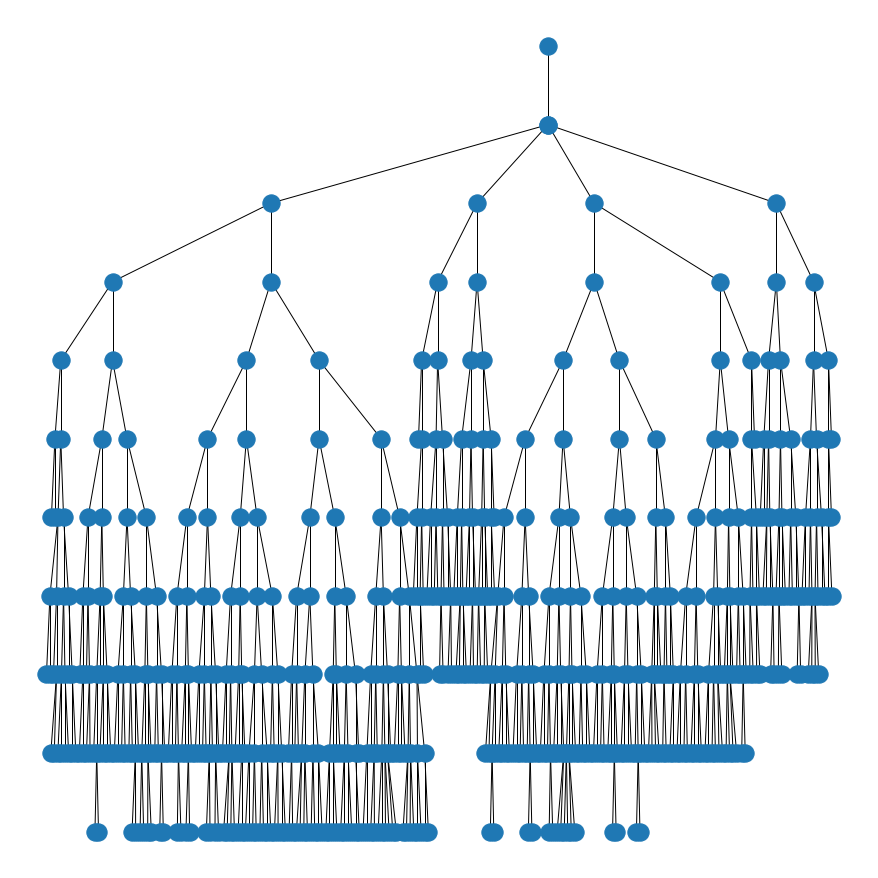

In [7]:
p = ctree.Partition(min_leaf_size=5)
p.fit(X, y)
ctree.plot_partition(p)